In [334]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from math import sqrt
import pandas as pd

In [335]:
T = 4.5
a = 0.08
b = 0.3
h = 0.25
ksi_0 = 200
N = int(T/h)
n = 20 # число реализаций
N

18

In [336]:
def Wiener_process_generation(T, h, n):
  N = int(T / h)
  w = np.zeros((n, N)) # n реализаций (строки) по N элементов (столбцы)
  for i in range (n):
    for j in range(1, N):
      w[i][j]=w[i][j-1] + np.random.normal(0, np.sqrt(h))
  return w

In [337]:
w = Wiener_process_generation(T, h, 20)
w_mtx_visual = pd.DataFrame(w)
w_mtx_visual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.483527,0.916137,1.286652,2.167096,2.185456,2.042398,1.820100,1.739966,2.438933,2.415256,1.435084,1.713168,2.237255,1.869337,1.217811,1.581002,1.653442
1,0.0,-0.317938,-1.300229,-1.983333,-1.870326,-1.522474,-1.155245,-0.946218,-0.169082,0.616985,0.019205,-0.930329,-1.118780,-0.871482,-0.757045,-0.931152,-0.253637,-0.255807
2,0.0,-0.304705,-0.216684,0.214511,-0.498928,-0.632910,-0.395264,-1.002281,-0.216383,-0.797926,-1.236747,-1.522670,-2.284797,-2.483338,-2.829782,-2.468520,-2.175934,-2.564117
3,0.0,0.521833,0.537898,0.694834,0.880872,0.964480,0.537803,1.959034,2.023345,2.037028,2.210095,2.266757,2.355016,3.358766,2.643428,3.120929,4.044161,3.637524
4,0.0,-0.061772,0.796903,1.496912,0.817686,0.701831,0.172720,-0.248781,-0.407597,-0.667780,-0.819191,-0.456420,-0.816989,-0.769427,-0.576137,-1.366927,-1.631677,-1.571586
5,0.0,-0.473761,0.060040,0.544108,0.111280,-0.219504,-0.578255,-0.093820,0.355512,0.409673,-0.560049,-0.614996,-0.440662,-0.028530,0.301036,0.270575,0.082153,0.342597
6,0.0,1.128750,0.438037,-0.543842,0.192133,0.108205,0.062225,0.238513,-0.432462,-0.607370,-1.466434,-1.230449,-1.454863,-1.758884,-1.521917,-2.172129,-1.429491,-2.311735
7,0.0,-0.230018,-0.084843,-0.403850,-0.941140,-1.207862,-0.737248,-1.725083,-2.225544,-2.035154,-2.197356,-1.946597,-1.852209,-2.425644,-2.658886,-3.013344,-3.311883,-4.021287
8,0.0,-0.305808,-0.208806,-0.062404,0.312782,0.621867,0.917566,0.955347,0.450484,0.881409,0.843070,0.435949,0.586326,0.583706,1.543325,1.738561,1.589036,0.526274
9,0.0,0.083591,0.399473,0.194132,0.555534,0.879719,0.407269,0.169131,0.652140,1.066168,1.043918,0.405497,0.529479,0.520312,0.769833,0.080655,-0.726636,-1.766517


In [338]:
def ksi_generation(T, h, b, w, n):
  N = int(T / h)
  ksi = np.zeros((n, N))
  for i in range (n):
    ksi[i] = np.array([ksi_0*np.exp((a-(b**2)/2)*j*h + b*w[i][j]) for j in range(N)])
  return ksi

In [339]:
ksi = ksi_generation(T, h, b, w, n)
ksi_mtx_visual = pd.DataFrame(ksi)
ksi_mtx_visual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,200.0,233.253420,267.912010,302.041098,396.805519,402.503659,388.983387,367.086461,361.516277,449.774868,450.516218,338.692435,371.395591,438.449096,396.080942,328.622819,369.672690,381.114514
1,200.0,183.403013,137.792465,113.246554,118.181278,132.333472,149.044321,160.084520,203.892475,260.385370,219.549733,166.578834,158.806020,172.538908,180.134510,172.469732,213.199080,214.932771
2,200.0,184.132545,190.721115,218.966934,178.330554,172.810262,187.211318,157.414612,201.019633,170.321788,150.625014,139.458399,111.930507,106.385157,96.726044,108.745622,119.765679,107.536697
3,200.0,235.949366,239.172898,252.905945,269.772503,279.055658,247.685124,382.709998,393.594360,398.686687,423.623851,434.673237,450.258606,613.817278,499.618941,581.636769,773.995221,691.127743
4,200.0,198.053225,258.498081,321.706947,264.706883,257.911561,221.990200,197.341001,189.812807,177.103307,170.726046,192.028008,173.854851,177.903157,190.180980,151.333988,141.007652,144.834479
5,200.0,175.026809,207.230011,241.724793,214.155258,195.628253,177.210936,206.731584,238.643556,244.684389,184.528264,183.106596,194.633589,222.184571,247.430084,247.334057,235.795119,257.198088
6,200.0,283.069441,232.113966,174.411022,219.413335,215.838184,214.752200,228.405239,188.402139,180.342241,140.595524,152.236124,143.575117,132.211401,143.200008,118.857918,149.825306,115.994988
7,200.0,188.304816,198.415753,181.891855,156.174724,145.432024,168.956805,126.727931,110.019107,117.509731,112.912194,122.803845,127.441147,108.242509,101.814393,92.348020,85.178784,69.455148
8,200.0,184.071648,191.172405,201.511439,227.500403,251.798108,277.573904,283.205100,245.540675,281.882428,281.107876,250.974689,264.863656,266.981418,359.176803,384.189362,370.564705,271.768250
9,200.0,206.881178,229.444034,217.632298,244.686415,272.049198,238.173177,223.700161,260.853574,297.947664,298.566538,248.692339,260.384962,261.951950,284.794366,233.635899,184.994585,136.607548


In [340]:
def x_generation(T, h, b, w, n):
  N = int(T / h)
  x = np.zeros((n, N))
  for i in range (n):
    x[i][0] = ksi_0
    for j in range(1, N):
      x[i][j] = x[i][j-1] + a*x[i][j-1]*h + b*x[i][j-1]*(w[i][j]-w[i][j-1])
  return x

In [341]:
x = x_generation(T, h, b, w, n)
x_mtx_visual = pd.DataFrame(x)
x_mtx_visual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,200.0,233.011627,267.912832,303.050802,389.157593,399.084188,389.938155,371.732245,370.230319,455.268557,461.140115,334.763905,369.386980,434.851935,395.552136,326.149372,368.208729,383.574778
1,200.0,184.923724,134.127523,109.323141,115.215917,129.543631,146.406155,158.515145,198.641803,249.458340,209.711158,154.167039,148.534512,162.524875,171.355028,165.831896,202.854634,206.779650
2,200.0,185.717697,194.336182,223.361944,180.022611,176.387121,192.490168,161.286576,202.538750,171.253995,152.134150,142.127214,112.474057,108.024343,98.957495,111.661531,123.695937,111.764844
3,200.0,235.309973,241.150245,257.326831,276.835129,289.315474,258.068543,373.262401,387.929120,397.280162,425.852572,441.608543,462.133417,610.536100,491.724798,571.999094,741.865410,666.201796
4,200.0,200.293688,255.895710,314.752428,256.911030,253.119956,218.003738,194.797232,189.412093,178.415747,173.879881,196.281006,178.974817,185.108029,199.544012,156.195688,146.913748,152.500497
5,200.0,175.574358,207.202355,241.436436,214.914981,197.886178,180.546315,210.396128,242.965403,251.772446,183.563128,184.208505,197.526833,225.899524,252.752113,255.497462,246.165010,270.321989
6,200.0,271.724975,220.854321,160.215726,198.794489,197.765062,198.992358,213.496236,174.790927,169.115058,128.913155,140.617905,133.963247,124.424233,135.758055,111.991775,139.182390,105.128216
7,200.0,190.198928,202.286562,186.973007,160.574868,150.937707,175.266496,126.831499,110.325842,118.833851,115.427992,126.419952,132.528102,112.379788,106.763868,97.546173,90.760679,73.260095
8,200.0,185.651541,194.767142,207.216752,234.684547,261.139503,289.527876,298.599986,259.346405,298.060973,300.594025,269.892433,287.465964,292.989298,383.196513,413.304572,403.030857,282.593795
9,200.0,209.015449,233.003008,223.309569,251.987100,281.533967,247.261462,234.541973,273.218564,312.619035,316.784674,262.447780,277.458379,282.244518,309.017190,251.307154,195.469881,138.399644


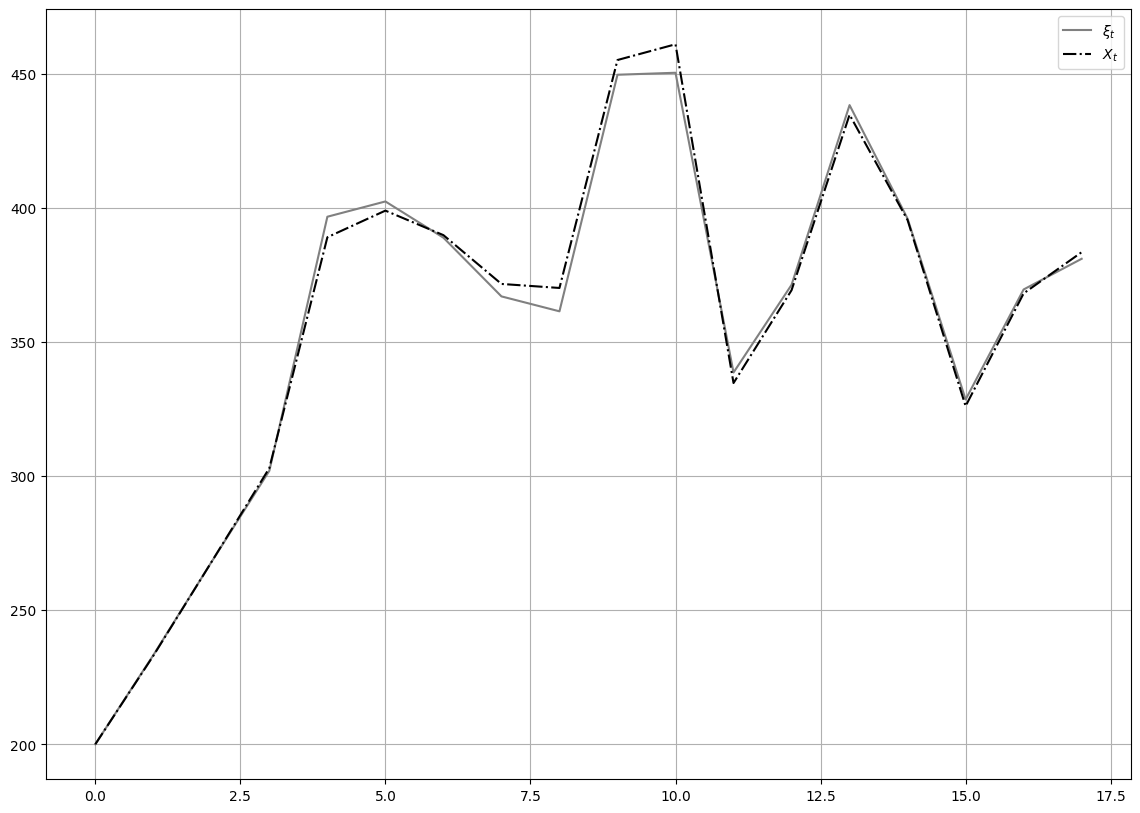

In [342]:
plt.figure(figsize=(14,10))
plt.plot(range(0,N), ksi[0], 'grey', label='$\u03BE_t$')
plt.plot(range(0,N), x[0], 'k-.', label='$X_t$')
plt.grid()
plt.legend()
plt.show()

In [343]:
def eps_val (x, ksi, n):
  sum = 0
  for j in range(n):
    sum += np.abs(ksi[j][-1]-x[j][-1])
  delta = 1/n * sum
  return delta


In [344]:
eps_b = eps_val (x, ksi, n)
print ('При b = 0.3 eps(0.25) =', eps_b)

При b = 0.3 eps(0.25) = 10.980009726683996


In [345]:
ksi_2b = ksi_generation(T, h, 2*b, w, n)
x_2b = x_generation(T, h, 2*b, w, n)
eps_2b = eps_val(x_2b, ksi_2b, n)
print ('При b = 0.6 eps(0.25) =', eps_2b)

При b = 0.6 eps(0.25) = 44.494153439362734


In [350]:
ksi_2b_mtx_visual = pd.DataFrame(ksi_2b)
ksi_2b_mtx_visual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,200.0,260.716507,329.639569,401.540669,664.194616,654.971032,586.255618,500.384826,465.120620,689.989901,663.461473,359.375385,414.145842,553.172601,432.645988,285.432030,346.166065,352.616976
1,200.0,161.185296,87.197877,56.447856,58.916550,70.798139,86.070788,95.162550,147.949082,231.252013,157.565334,86.931459,75.720547,85.663614,89.486729,78.620001,115.138458,112.149545
2,200.0,162.470158,167.052325,211.035021,134.150242,120.731747,135.796668,92.014757,143.809254,98.944756,74.163301,60.929369,37.616359,32.567497,25.801897,31.255816,36.334109,28.074086
3,200.0,266.778064,262.711392,281.524070,306.997831,314.821289,237.697580,543.884913,551.324909,542.145470,586.618367,591.920166,608.700786,1084.177828,688.402719,894.151232,1517.491667,1159.601835
4,200.0,187.964712,306.880732,455.531418,295.576846,268.920586,190.938065,144.611239,128.221515,106.980767,95.278391,115.522476,90.751424,91.072994,99.746794,60.531331,50.365729,50.925601
5,200.0,146.798507,197.224233,257.181575,193.462781,154.719688,121.676287,158.701511,202.679257,204.204303,111.306529,105.037726,113.740571,142.052898,168.837842,161.687004,140.837847,160.593408
6,200.0,383.971035,247.432940,133.889128,203.079450,188.338446,178.689962,193.722255,126.322740,110.929559,64.615668,72.606043,61.892522,50.299089,56.552378,37.339071,56.861735,32.664099
7,200.0,169.916417,180.803683,145.620985,102.887221,85.507168,110.605389,59.636492,43.077065,47.097736,41.675089,47.245589,48.763982,33.714599,28.587958,22.540443,18.378609,11.711193
8,200.0,162.362709,167.843830,178.729758,218.325409,256.322867,298.526012,297.830750,214.563958,271.011907,258.309795,197.331848,210.632100,205.108838,355.779852,390.119756,347.838669,179.303876
9,200.0,205.094706,241.773396,208.470281,252.557144,299.210843,219.791358,185.823224,242.160588,302.783589,291.391659,193.759118,203.568987,197.453836,223.680217,144.273451,86.689758,45.304530


In [351]:
x_2b_mtx_visual = pd.DataFrame(x_2b)
x_2b_mtx_visual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,200.0,262.023254,335.276101,416.516511,644.878511,664.879938,621.107496,550.687292,535.223616,770.390271,774.853776,334.656788,397.187644,530.027800,423.624583,266.495495,329.898688,350.835312
1,200.0,165.847449,71.418119,43.574861,47.400939,58.242040,72.239778,82.744628,122.981825,183.444598,121.317803,54.626955,49.542800,57.884748,63.016936,57.694261,82.301397,83.840254
2,200.0,167.435395,179.626826,229.691877,135.962957,127.752254,148.523182,97.400059,145.275971,97.490909,73.772127,62.591658,35.221811,31.730475,25.769373,31.870464,38.102781,29.990318
3,200.0,266.619945,274.522285,305.862268,346.120695,370.406067,282.988031,529.962575,561.011300,576.837460,648.273072,683.278070,733.126660,1189.315010,702.643500,918.004371,1444.882981,1121.255125
4,200.0,196.587376,301.801909,434.596412,266.174730,252.995689,177.737819,136.342668,126.077471,108.917031,101.200692,125.252258,100.660111,105.545866,119.897318,65.407127,56.325337,59.482644
5,200.0,147.148716,197.220536,258.445884,196.497127,161.428258,129.909250,170.266988,219.576234,231.103167,101.261768,99.948571,112.402220,142.445013,173.460880,173.759866,157.590957,185.368971
6,200.0,339.449951,205.561547,88.570810,129.453787,125.523997,124.571479,140.239234,86.585751,79.230753,39.976790,46.436688,41.112778,34.435553,40.020321,25.207720,36.943990,18.126716
7,200.0,176.397857,195.290979,161.817213,112.887927,97.079865,126.433768,54.025003,38.883041,44.102475,40.692412,47.628666,51.278578,34.661191,30.503741,24.626450,20.707797,12.307837
8,200.0,167.303083,180.386382,199.839424,248.822409,299.943271,359.157837,374.482492,268.534841,343.336533,342.305447,265.535645,294.804628,300.237212,479.109953,544.815865,506.834038,193.784557
9,200.0,214.030898,258.876589,232.159383,287.144253,348.739839,256.857436,225.294047,295.091332,374.298930,376.787997,239.994157,262.647019,266.455366,311.676202,189.029446,101.248950,40.101803


In [346]:
#h_arr=[0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
#h_arr=[ 0.01, 0.05, 0.1, 0.25, 0.5]
h_arr=[0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005]

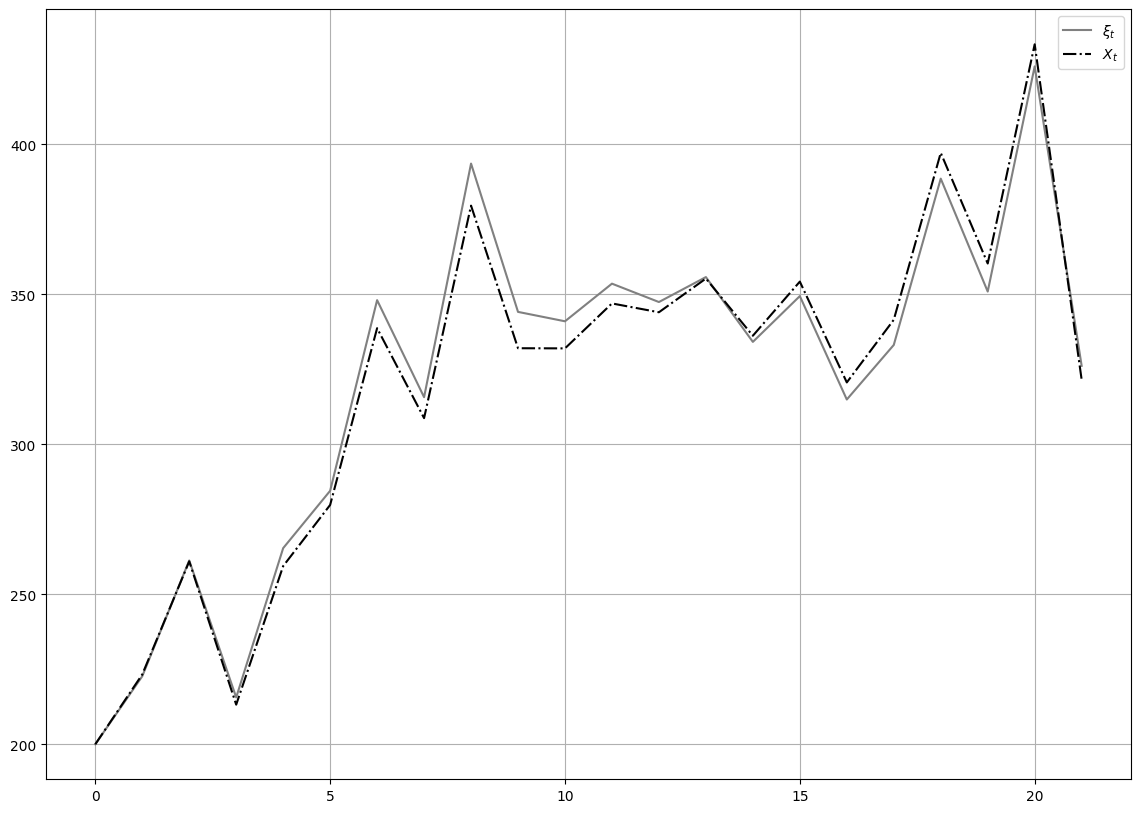

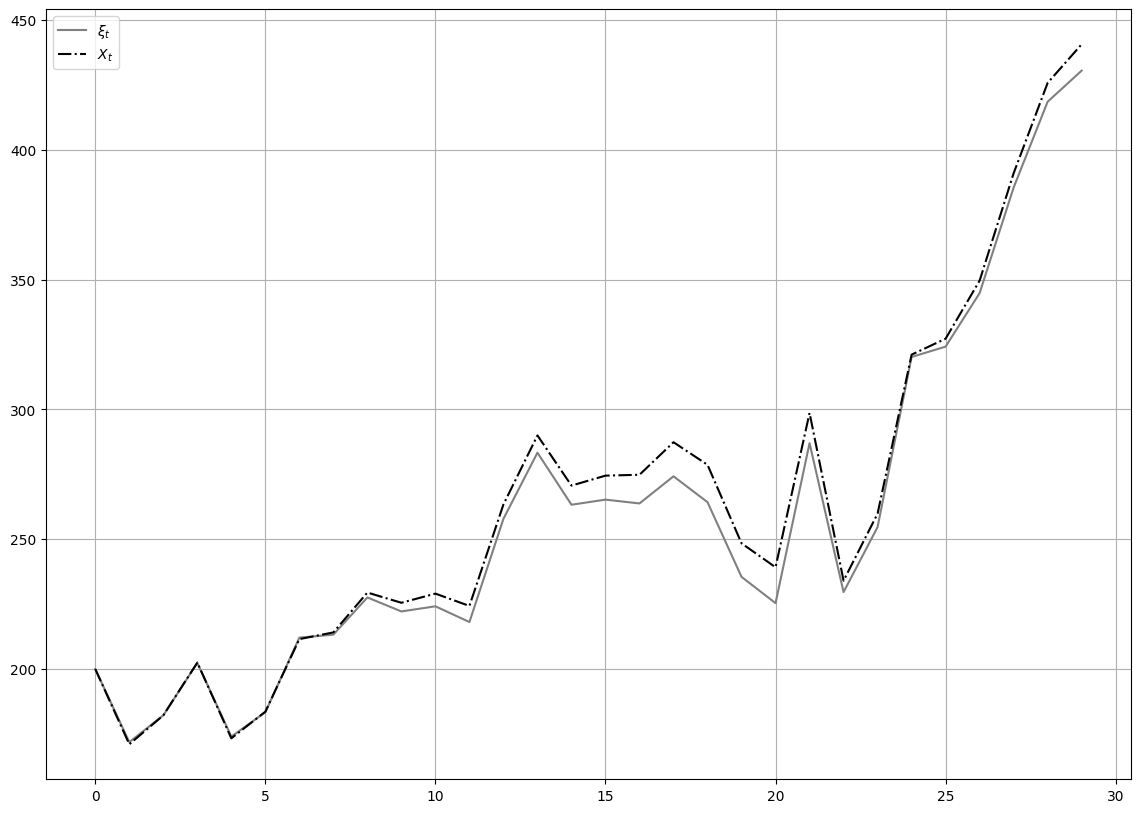

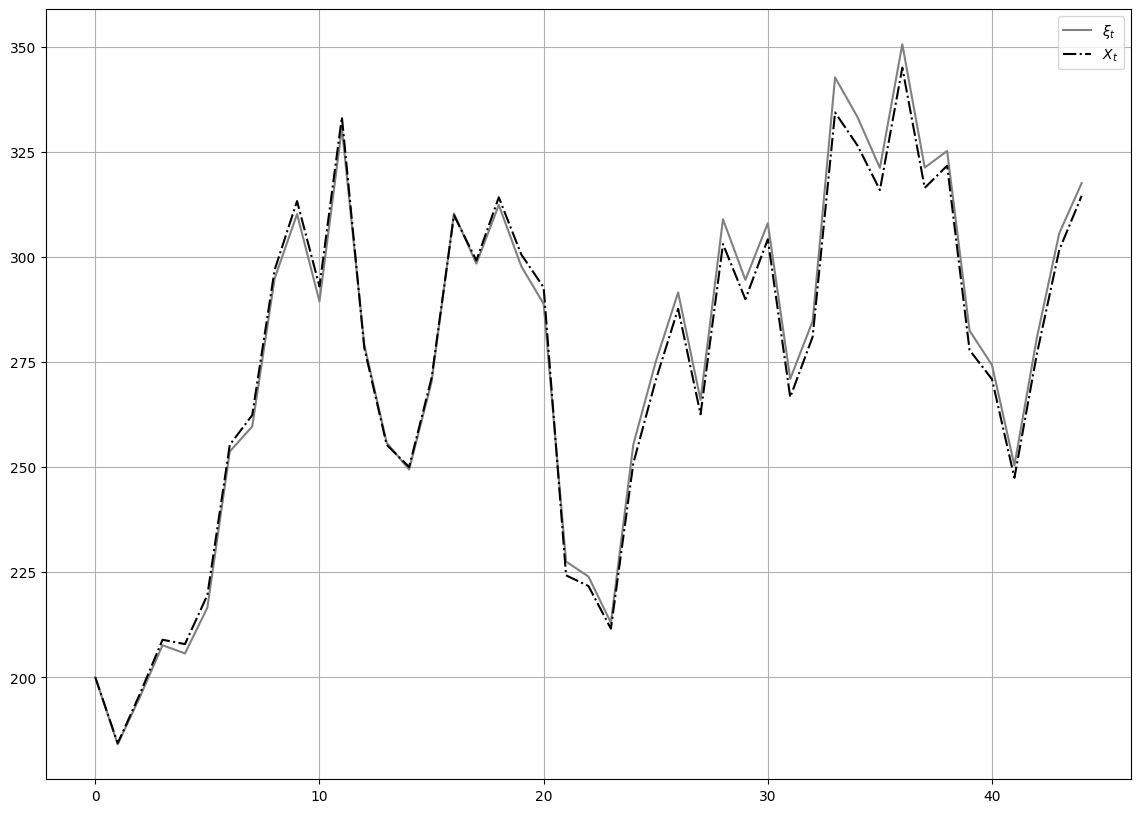

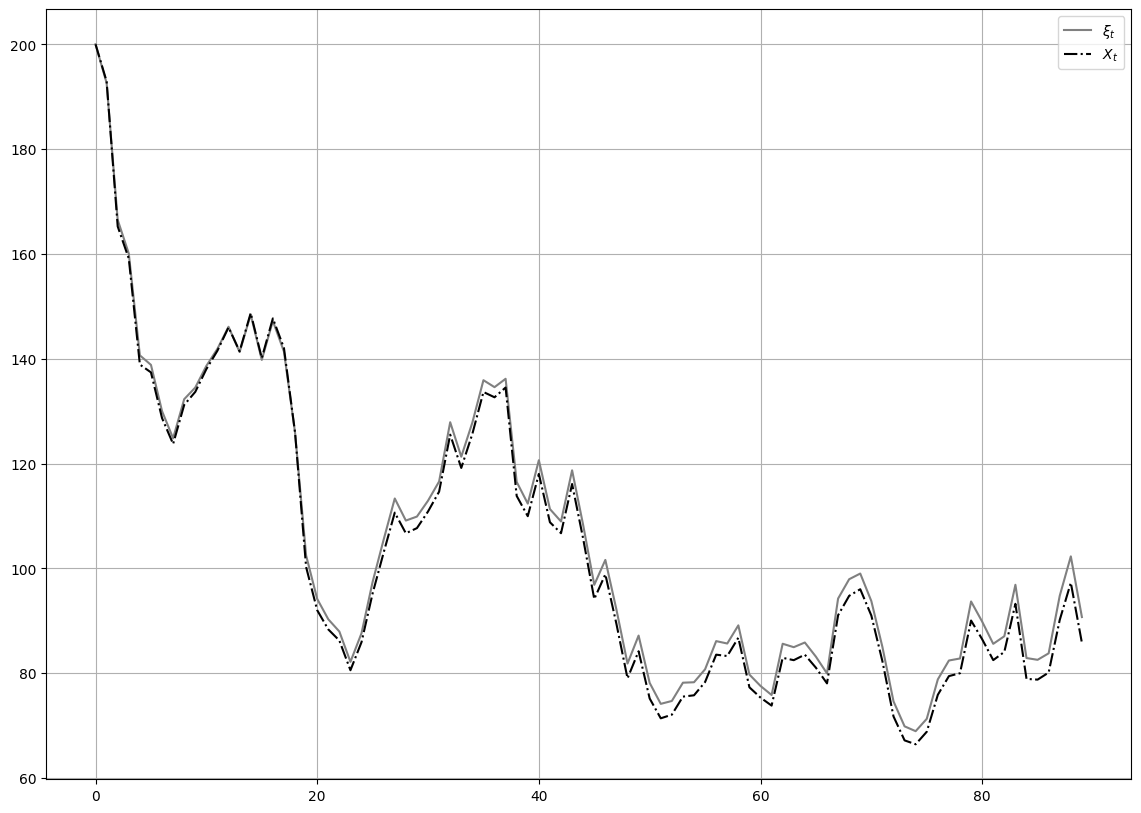

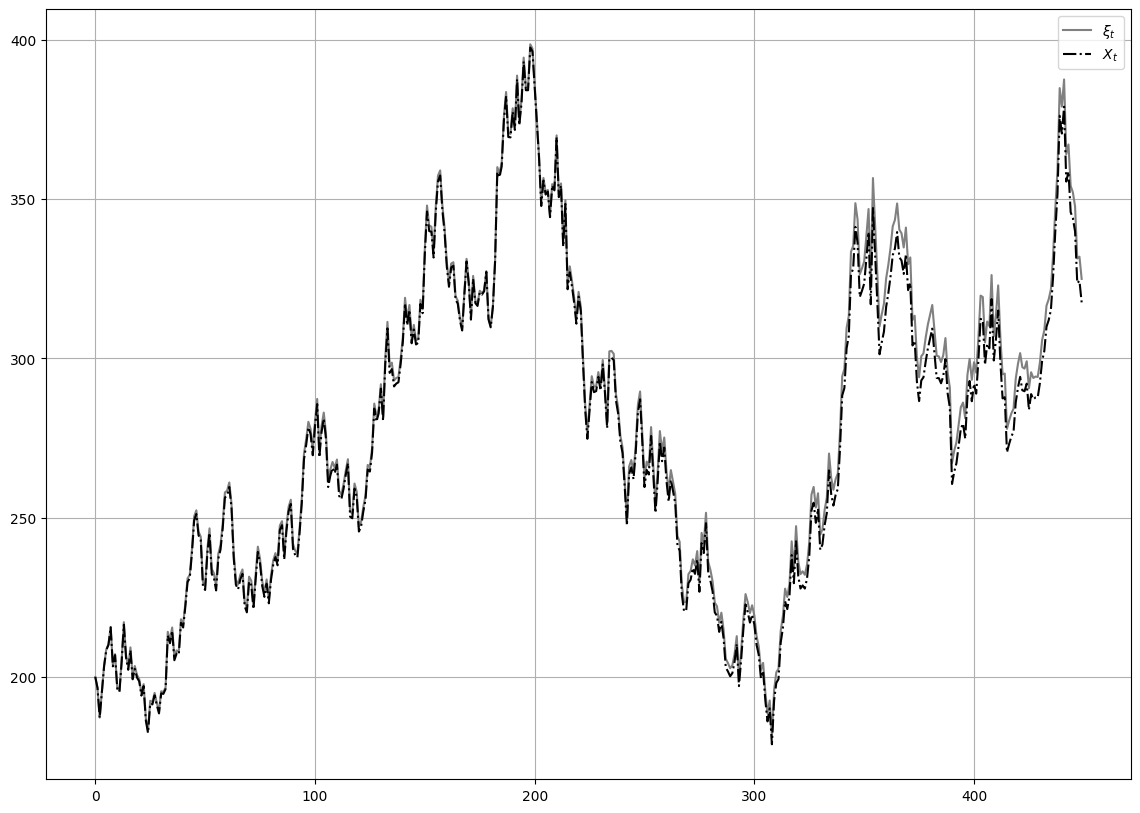

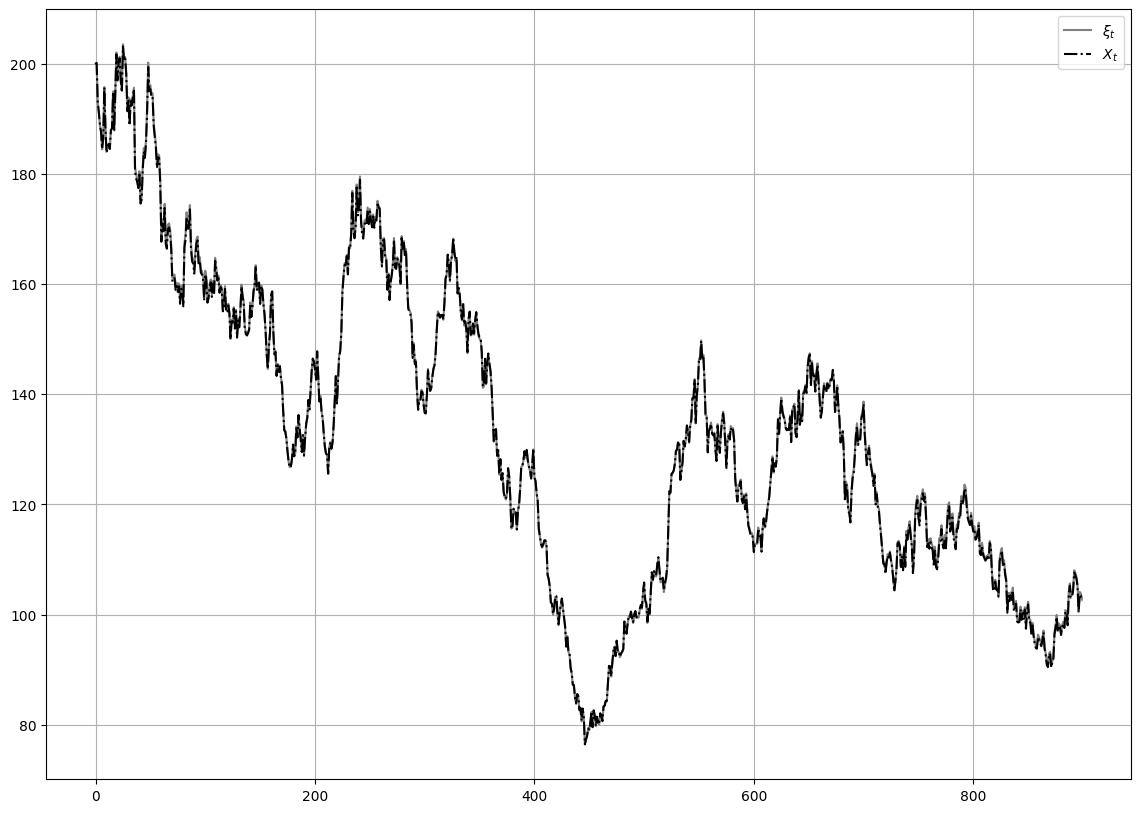

In [358]:
eps_arr = np.zeros(len(h_arr))
eps_arr[0] = eps_b
for i in range(1, len(h_arr)):
  w = Wiener_process_generation(T, h_arr[i], n)
  ksi = ksi_generation(T, h_arr[i], b, w, n)
  x = x_generation(T, h_arr[i], b, w, n)

  plt.figure(figsize=(14,10))
  plt.plot(range(0, int(T / h_arr[i])), ksi[0], 'grey', label='$\u03BE_t$')
  plt.plot(range(0, int(T / h_arr[i])), x[0], 'k-.', label='$X_t$')
  plt.grid()
  plt.legend()
  plt.show()

  eps_arr[i] = eps_val(x, ksi, n)


In [ ]:
eps_mtx_visual = pd.DataFrame(eps_arr)
eps_mtx_visual

In [348]:
F = np.ones((len(h_arr), 2))
F[:, 1] = np.log(np.array(h_arr))
F_mtx_visual = pd.DataFrame(F)
F_mtx_visual

,0,1
0,1.0,-1.386294
1,1.0,-1.609438
2,1.0,-1.897120
3,1.0,-2.302585
4,1.0,-2.995732
5,1.0,-4.605170
6,1.0,-5.298317


In [349]:
print('β =',np.linalg.inv(F.T.dot(F)).dot(F.T).dot(np.log(eps_arr)))


β = [3.31307493 0.51382318]
